# Data Cleaning

In [13]:
import pandas as pd
import re

rawWineDF = pd.read_csv("../Data/winemag-data-130k-v2.csv")
rawWineDF['Year'] = ''
##############################################################################
def GetYear(strn):
    yearValue = 'Nan'
    try: yearValue = int(re.findall('(\d{4})', strn)[0])
    except: yearValue = 'Nan' 
    return yearValue
##############################################################################
rawWineDF.Year = rawWineDF.apply(lambda row: GetYear(row.title),axis=1)
##############################################################################
rawWineDF.to_csv('../Data/WineData.csv')
wineDF = rawWineDF[['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'title', 'variety', 'winery', 'Year']]
wineDF = wineDF.rename(columns={'region_1': 'region'})

In [14]:
wineDF.head()

,country,description,designation,points,price,province,region,title,variety,winery,Year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [15]:
temp = wineDF.country.dropna()

In [16]:
wineDF.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [17]:
temp.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China', 'Egypt'], dtype=object)

# Regional Score/Price Comparison

In [18]:
#Import Dependencies
import matplotlib.pyplot as plt
import numpy as np

In [61]:
#Create Region Score DF
region_group = wineDF.groupby(['region'])
region_average_score = region_group['points'].mean()
region_average_price = region_group['price'].mean()
region_count = region_group['points'].count()

region_df = pd.DataFrame({
    'Region Average Score':region_average_score,
    'Region Average Price':region_average_price,
    'Wines in Region':region_count
})

#Drop regions with less than 300 wines reviewed for the bar plots and less than 100 wines reviewed for the scatter plot
region_df_300 = region_df[region_df['Wines in Region'] > 300].reset_index()
region_df_100 = region_df[region_df['Wines in Region'] > 100].reset_index()
region_df.head()

,Region Average Score,Region Average Price,Wines in Region
region,,,
Abruzzo,89.000000,34.000000,6
Adelaida District,91.254545,51.727273,110
Adelaide,87.625000,20.875000,16
Adelaide Hills,87.822430,22.076190,107
Adelaide Plains,84.250000,13.750000,4


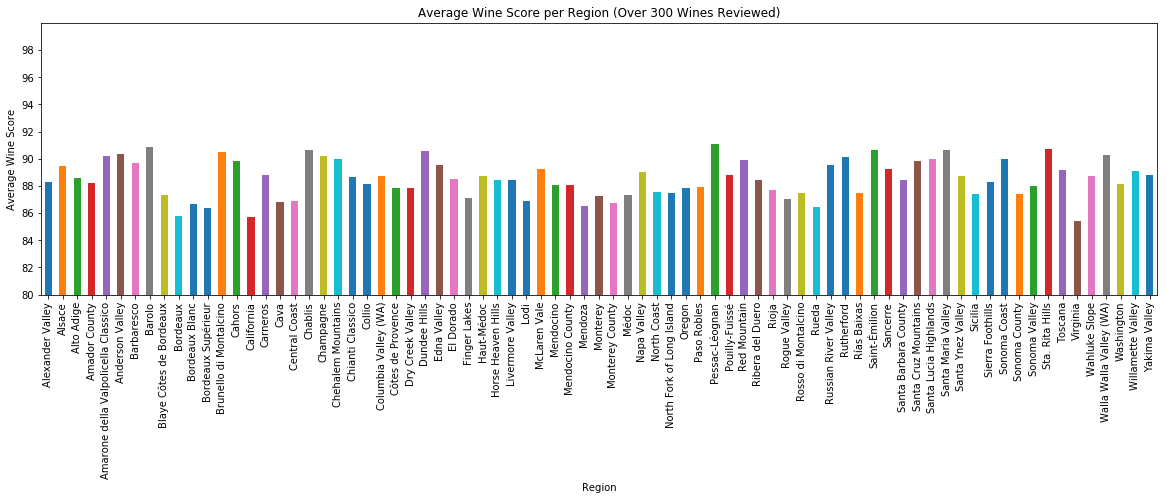

In [69]:
#Plot scores
region_df_300.plot.bar(x='region',y='Region Average Score',figsize=(20,5),yticks=np.arange(80,100,2),ylim=(80,100),legend=False)
plt.xlabel('Region')
plt.ylabel('Average Wine Score')
plt.title('Average Wine Score per Region (Over 300 Wines Reviewed)')
plt.savefig('Average_Wine_Scores.png')
plt.show()

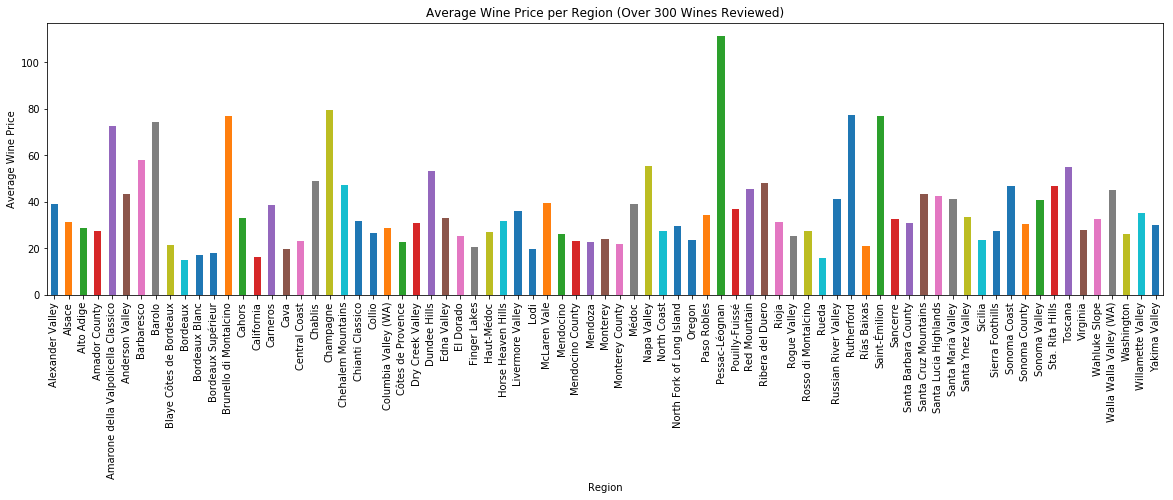

In [70]:
#Plot Prices
region_df_300.plot.bar(x='region',y='Region Average Price',figsize=(20,5),legend=False)
plt.xlabel('Region')
plt.ylabel('Average Wine Price')
plt.title('Average Wine Price per Region (Over 300 Wines Reviewed)')
plt.savefig('Average_Wine_Prices.png')
plt.show()

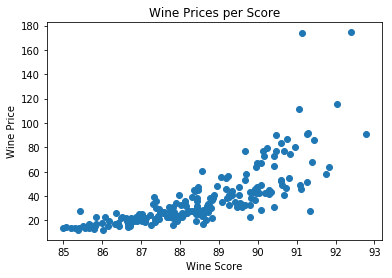

In [71]:
#Create scatter plot to show trend
plt.scatter(region_df_100['Region Average Score'],region_df_100['Region Average Price'])
plt.xlabel('Wine Score')
plt.ylabel('Wine Price')
plt.title('Wine Prices per Score')
plt.savefig('Price_vs_Scores.png')
plt.show()